#Improving Computer Vision Accuracy using Convolutions

지금까지 Deep Neural Network (DNN) 를 이용해서 패션 mnist 를 분류했다.  

CNN Convolutional neural network
ANN Artificial neural network

- Convolutional Layer   
피쳐, 필터, 커널이라고 함  
이미지가 Kernels (2차원 행렬) 처음에는 랜덤으로 셋팅  
(몇행 몇열로 할지는 사람이 정한) - 하이퍼 파라미터  
커널을 몇개로 할지도 하이퍼 파라미터   
Convolutional Layer에서 사진을 필터링을 한다 (연산)

- pooling layer (downsampling)  
2차원을 1차원으로 flatten하게 해서 

setosa.io/ev/image-kernels/


커널은 (피쳐 디텍터 라고도 함)

|커|널| |
|--|--|--|
|0 |-1 |0|
|-1| 5 |-1|
|0 |-1| 0|


원본의 이미지의 숫자 

|원 |본 | |
|--|--|--|
|206 |205 | 247|
|244|161| 137|
|192| 154| 75|

여기에서 커널과 원본의 이미지의 숫자 두개를 곱함  
(0 * 206) + (-1 * 205) + (0 + 247) +  
(-1 * 244) + (5 * 161) + (-1 * 137) +  
(0 * 192) + (-1 * 154) + (0 * 75)   
9개를 각각 곱하고 더한다 --> 312 하나의 값이 나옴  

그리고 오른쪽으로 한칸 이동.   
3 X 3 행렬로 각각 9개를 커널과 원본과 매칭되는 것들끼리 곱하고 다 더함  
그러면 숫자 하나 나옴  
(-가 나오면 0으로 처리, 255 이상이면 255로 처리)  

이런식으로 처리가 된다고 함  

커널 갯수만큼 이미지가 변환되서 나온다  
여기에서 액티베이션 함수를 relu를 적용  

(Pooling Layer 전에 이미지가 나옴)  

참고
https://poloclub.github.io/cnn-explainer/

Pooling은 2행 X 2열로 한다고 하면 그대로 2행2열씩 이동
(필터링/커널과 다름)

Dropout 을 통해 Overfitting을 줄인다  
(학습시에는 오차율이 거의 없어서 완벽할정도인데, 신규 데이터가 들어가면 오차가 심해지는 것)





In [3]:
import tensorflow as tf
import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#fashion_mnist 데이터셋 받아오기
mnist = tf.keras.datasets.fashion_mnist

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [37]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [38]:
# Sequential( [ ] ) 안에 리스트 형태로 Flatten(), Dense() 넣어줄 수 있음 
# === model.add( ) 와 같은 효과임
model = Sequential( [
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [39]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [40]:
test_hist = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6241 - accuracy: 0.7810
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3844 - accuracy: 0.8615
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3397 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3165 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2925 - accuracy: 0.8913


In [48]:
test_hist.history['accuracy'][-1]

0.8903666734695435

정확도가, 트레이닝셋은 89% 정도이고 테스트셋으로는  87% 정도가 나왔다. 

이제 Convolutional Neural Networks 이용해서 정확도를 향상시켜본다.




In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [50]:
X_train.shape

(60000, 28, 28)

In [51]:
# 3차원 일때 
# 28 x 28짜리 사진이 60,000장이 쭉~ 있다고 생각하면 됨

X_train = X_train.reshape(60000, 28, 28, 1)

In [52]:
X_train = X_train / 255.0

In [27]:
X_test.shape

(10000, 28, 28)

In [53]:
# 사진은 R G B로 3차원으로 되어 있기 때문에 28 x 28 x 3
# gray scale은 1로 되어 있어서 28 x 28 x 1
X_test = X_test.reshape(10000 , 28, 28, 1)

In [54]:
X_test = X_test / 255.0

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

In [70]:
model = Sequential()

In [71]:
#filters의 갯수는 필터(커널의) 갯수
#kernel_size= ( , ) 커널의 크기
# Conv2D === Convolutional Layer 설정도 하이퍼 파라미터로 밑에 MaxPooling2D와 쌍으로 사용되었는데
# 이것도 하이퍼 파라미터이기 때문에 꼭 쌍으로 안하고 하나씩만 해도 된다
# 정답이 없다
model.add ( Conv2D( filters = 64, kernel_size=(3, 3), activation='relu', input_shape= (28, 28, 1) ) )

In [72]:
# MaxPooling2D - 사진을 줄임 특징은 그대로 가지되, 컴퓨팅 효율을 높힌다
# 얼마나 줄일지 정함 (2, 2) --> 2행2열로 줄임
model.add( MaxPooling2D( 2, 2 ) )

In [73]:
# filters=, kernel_size= (,) 생략가능 (순서대로)
model.add( Conv2D(64, (3, 3), activation='relu'))

In [74]:
model.add( MaxPooling2D( 2, 2) )


In [75]:
# 마지막 나온 결과를 Flatten() 시킴
model.add( Flatten())

In [76]:
# 처음꺼는 생략가능 
model.add( Dense(128, activation='relu') )
model.add( Dense(10, activation='softmax'))

In [77]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [ ]:
#total params: 처음에 랜덤으로 찾아야할 243,786개

In [78]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
model_hist = model.fit(X_train, y_train, epochs=5 )

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.6095 - accuracy: 0.7772
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.8878
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.9092
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2172 - accuracy: 0.9185
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1880 - accuracy: 0.9289


In [80]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2686 - accuracy: 0.9039


트레이닝셋은 93% , 테스트셋은 91% 까지 나온다.


에포크를 20까지 해보면, 트레이닝셋 정확도는 올라가지만 밸리데이션 정확도는 내려간다. 즉, 오버핏팅이 된다.







```py
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```



다음처럼 모델링 해서 돌려보자


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


convolution 레이어 셋팅



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


DNN 구조를 붙이기 위해, 플래튼 한다.

```
  tf.keras.layers.Flatten(),
```


128 dense layers 와 10 output layers 를 셋팅한다.



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


컴파일하여 학습하고, 평가해 보자



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


# Visualizing the Convolutions and Pooling



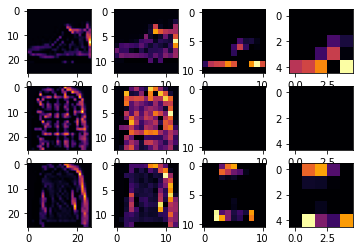

In [81]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. 컨볼루션 필터 갯수를 16 또는  64로 바꿔서 정확도를 확인하라.  

2. 맨 마지막 컨볼루션 지우고 해본다.

3. 콜백 셋팅해서 돌려본다.